# Une régression logistique pour prédire l'achat d'une voiture

Charger le fichier Social_Network_Ads.csv et regarder ce qu'il contient.

## Import des libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import des données

In [3]:
df = pd.read_csv('Data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Visualisation des données

Regardez via des graphiques de votre choix les effets des différentes variables sur l'achat d'une voiture.

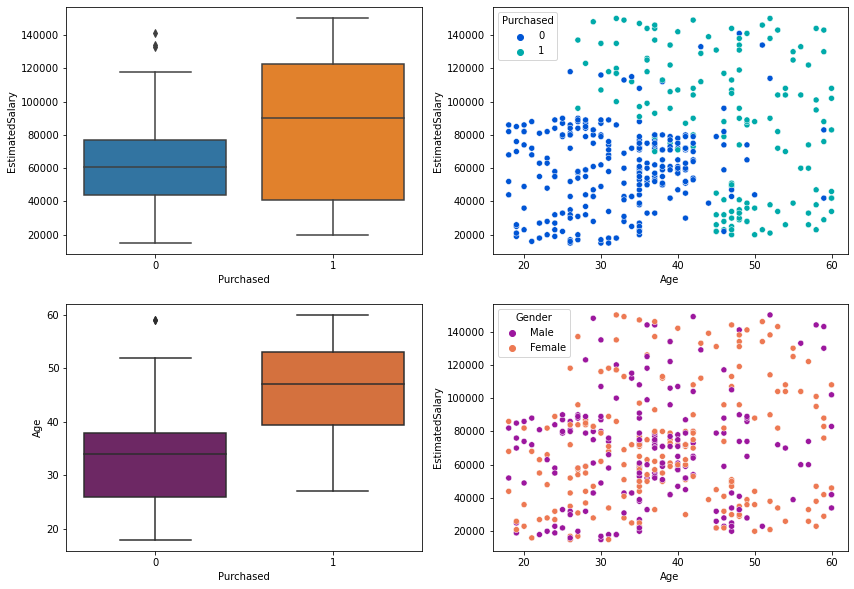

In [18]:
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(data=df, x='Purchased', y ='EstimatedSalary', ax=ax[0,0])
sns.scatterplot(data=df, x='Age', y ='EstimatedSalary', hue='Purchased', palette='winter', ax=ax[0,1])
sns.boxplot(data=df, x='Purchased', y ='Age', palette ='inferno', ax=ax[1,0])
sns.scatterplot(data=df, x='Age', y ='EstimatedSalary', hue='Gender', palette='plasma', ax=ax[1,1]);

## Création de X et y (on ne prend que l'age et le salaire estimé dans X)

Dans un premier temps on n'utilisera dans notre modèle que Age et EstimatedSalary comme variables explicatives.

In [19]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

## Création d'un Training set et d'un Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

## Entraînement d'une régression logistique sur le Training set

In [30]:
# Entraînement du modèle
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear')
reglog.fit(X_train, y_train)

# Prédire les classes du Test set
y_pred = reglog.predict(X_test)

# Créer et afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

,predit 0,predit 1
vrai 0,52,0
vrai 1,27,1


Il y a visiblement un problème...d'où peut-il venir ? Une idée d'une solution ? Le *features scaling*...

Essayer les 2 méthodes de *features scaling* : la normalisation et la standardisation et réentrainer le modèle à chaque fois pour voir les résultats.

#### Standardisation des features avec StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [78]:
# Entraînement du modèle
reglog_std = LogisticRegression(solver='liblinear')
reglog_std.fit(X_train_std, y_train)

# Prédire les classes du Test set
y_pred = reglog_std.predict(X_test_std)

# Créer et afficher la matrice de confusion
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog_std.classes_],
             index = [f'vrai {k}' for k in reglog_std.classes_])

,predit 0,predit 1
vrai 0,50,2
vrai 1,8,20


#### Normalisation des features avec MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler
mM_scaler = MinMaxScaler()
X_train_mM = mM_scaler.fit_transform(X_train)
X_test_mM = mM_scaler.transform(X_test)

In [79]:
# Entraînement du modèle
reglog_mM = LogisticRegression(solver='liblinear')
reglog_mM.fit(X_train_mM, y_train)

# Prédire les classes du Test set
y_pred = reglog_mM.predict(X_test_mM)

# Créer et afficher la matrice de confusion
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog_mM.classes_],
             index = [f'vrai {k}' for k in reglog_mM.classes_])

,predit 0,predit 1
vrai 0,51,1
vrai 1,9,19


In [51]:
# prédiction sur le train
pd.DataFrame(confusion_matrix(y_train, reglog.predict(X_train_mM)),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

,predit 0,predit 1
vrai 0,192,13
vrai 1,48,67


In [52]:
# prédiction sur le train
pd.DataFrame(confusion_matrix(y_train, reglog.predict(X_train_std)),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

,predit 0,predit 1
vrai 0,195,10
vrai 1,54,61


## Visualisation des classes sur un graphique

Essayer d'obtenir le graphique suivant. C'est pas facile mais possible ! Faites 2 graphique séparés : un pour les données du training set et un pour les données du test set

<table><tr>
<td> <img src="img/viz.png"/> </td>
<td> <img src="img/viz2.png"/> </td>
</tr></table>

Vous pourrez utiliser :
- np.meshgrid
- plt.contourf
- ListedColormap
- plt.pcolormesh

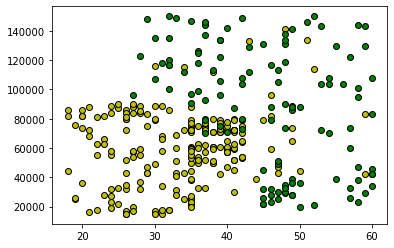

In [66]:
plt.scatter(X_train.loc[y==0,'Age'], X_train.loc[y==0,'EstimatedSalary'],
            color='y', edgecolor='k', label="Y=0")
plt.scatter(X_train.loc[y==1,'Age'], X_train.loc[y==1,'EstimatedSalary'],
            color='g', edgecolor='k', label="Y=1");

In [86]:
X1, X2 = np.meshgrid(
    np.arange(start=X_train.Age.min(), stop=X_train.Age.max()+1, step=0.1),
    np.arange(start=X_train.EstimatedSalary.min(), stop=X_train.EstimatedSalary.max()+1, step=1000)
)
X1,X2

(array([[18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9],
        [18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9],
        [18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9],
        ...,
        [18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9],
        [18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9],
        [18. , 18.1, 18.2, ..., 60.7, 60.8, 60.9]]),
 array([[ 15000,  15000,  15000, ...,  15000,  15000,  15000],
        [ 16000,  16000,  16000, ...,  16000,  16000,  16000],
        [ 17000,  17000,  17000, ...,  17000,  17000,  17000],
        ...,
        [148000, 148000, 148000, ..., 148000, 148000, 148000],
        [149000, 149000, 149000, ..., 149000, 149000, 149000],
        [150000, 150000, 150000, ..., 150000, 150000, 150000]]))

In [89]:
# on transforme X1 et X2 en colonne puis on les colle
XX_plot = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis=1)

# on va faire la prédiction pour chacun de ces points
# d'abord on scale
XX_plot = std_scaler.transform(XX_plot)

# puis on prédit
Y = reglog_std.predict(XX_plot)
Y = Y.reshape(X1.shape)
Y

/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

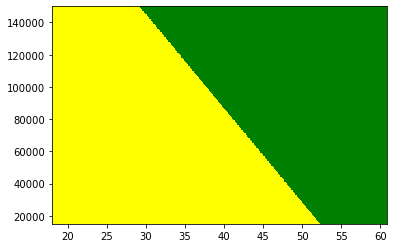

In [99]:
from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, Y, cmap = ListedColormap(('yellow', 'green')));
#plt.contourf(X1, X2, Y, cmap = 'YlGn');

/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


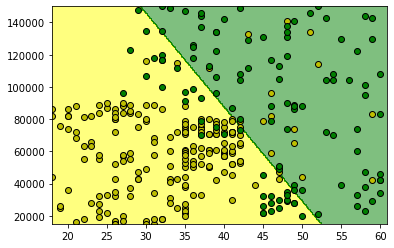

In [95]:
X1, X2 = np.meshgrid(
    np.arange(start=X_train.Age.min(), stop=X_train.Age.max()+1, step=0.1),
    np.arange(start=X_train.EstimatedSalary.min(), stop=X_train.EstimatedSalary.max()+1, step=1000)
)
XX_plot = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis=1)
XX_plot = std_scaler.transform(XX_plot)
Y = reglog_std.predict(XX_plot)
Y = Y.reshape(X1.shape)


from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, Y, cmap = ListedColormap(('yellow', 'green')), alpha=0.5);

plt.scatter(X_train.loc[y==0,'Age'], X_train.loc[y==0,'EstimatedSalary'],
            color='y', edgecolor='k', label="Y=0")
plt.scatter(X_train.loc[y==1,'Age'], X_train.loc[y==1,'EstimatedSalary'],
            color='g', edgecolor='k', label="Y=1");

## Un seconde régression logistique

Entraîner une nouvelle régression logistique en incluant cette fois la variable Gender

In [101]:
# Nouveaux X et y avec les 3 variables explicatives
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Dummies pour le genre
X = pd.concat((X.drop('Gender', axis=1), pd.get_dummies(X.Gender, drop_first=True)), axis=1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Régression logistique
# Entraînement du modèle
reglog_std2 = LogisticRegression(solver='liblinear')
reglog_std2.fit(X_train_std, y_train)

# Prédire les classes du Test set
y_pred = reglog_std2.predict(X_test_std)

# Créer et afficher la matrice de confusion
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog_std2.classes_],
             index = [f'vrai {k}' for k in reglog_std2.classes_])

,predit 0,predit 1
vrai 0,50,2
vrai 1,7,21


## Comparaison des 2 régressions logistiques

Comparer les 2 modèles pour déterminer lequel est le "meilleur".